In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
df = pd.read_csv('dataset/marketing_campaign.csv')

# Dataset Description

The dataset contains the following attributes:

## People

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

## Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

In [248]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

In [250]:
#df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[0]
#create a new column with name from the column names that are separated by \t
columns = df.columns[0].split('\t')
#loop through the columns string names
column_number = 0
for column in columns:
    #create a new column with the current name of the string
    row_values = []
    for i in range(len(df)):
        row_values.append(df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[i].split('\t')[column_number])
    column_number += 1
    df[column] = row_values
    #fill the new column with the values from the main column that are separated by \t but with the value that belong to it
#drop the main column
df.drop(columns=['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], inplace=True)

In [251]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [252]:
#show all the column of the df
pd.set_option('display.max_columns', None)

In [253]:
#check for null values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [254]:
#check for duplicates
df.duplicated().sum()

0

In [255]:
#drop Z_CostContact and Z_Revenue columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [256]:
#check for the data types
df.dtypes

ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Response               object
dtype: object

In [257]:
df['Income'] = df['Income'].replace('', np.nan)  # replace empty strings with NaN
df['Income'] = df['Income'].fillna(0)  # fill NaN values with 0

In [258]:
# List of columns to convert to 'int64'
int_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
            'Response','Income']

# Convert columns to 'int64'
for col in int_cols:
    df[col] = df[col].astype('int64')

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# List of columns to convert to 'string'
str_cols = ['Education', 'ID']

# Convert columns to 'string'
for col in str_cols:
    df[col] = df[col].astype('string')

In [259]:
df.sort_values(by='Dt_Customer', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
200,7300,1952,Graduation,Divorced,69142,0,1,2014-06-29,50,448,4,34,6,4,39,3,8,1,7,5,0,1,0,0,0,0,0
989,453,1956,PhD,Widow,35340,1,1,2014-06-29,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0
1812,8093,1969,Master,Married,79734,0,0,2014-06-28,72,572,8,232,23,62,17,1,4,3,6,1,0,0,0,1,0,0,0
796,6722,1954,PhD,Married,70421,0,1,2014-06-28,98,479,28,136,75,14,35,3,10,3,7,6,0,0,0,0,0,0,0
45,1371,1976,Graduation,Single,79941,0,0,2014-06-28,72,123,164,266,227,30,174,1,2,4,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,10001,1985,2n Cycle,Together,7500,1,0,2012-08-01,98,5,17,17,13,14,34,4,2,1,3,9,0,0,0,0,0,0,0
976,2611,1959,Master,Together,82576,0,0,2012-08-01,66,1206,55,445,168,18,18,1,2,4,12,1,0,0,1,0,0,0,0
2194,7118,1957,Graduation,Married,73803,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,1
1363,6181,1950,2n Cycle,Together,52203,0,0,2012-07-31,36,488,21,238,56,108,28,1,8,7,11,6,0,0,0,0,0,0,0


In [260]:
#feature about the number of days since the customer joined

# Get the latest date in 'Dt_Customer'
latest_date = df['Dt_Customer'].max()

# Calculate the number of days since each customer joined
df['Days_Since_Joined'] = (latest_date - df['Dt_Customer']).dt.days

In [261]:
#feature with the age of the customer
df['Age'] = latest_date.year - df['Year_Birth']

In [262]:
#feature with the total spending of the customer
df['Total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [263]:
#featue with the total number of childeren in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [264]:
#feature with the total number of purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [265]:
#feature with the total number of accepted campaigns divided by the total number of campaigns mulitplied by 100
df['Total_Accepted_Campaigns'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['Response'])

In [266]:
#just an ideas I haven't made my mind about it yet

#create an average spending per category feature

#create a category feature catagorizing the customer based on the income

#create an engagement score feature based on the number of purchases, 
#the number of visits and the number of accepted campaigns

#Customer Lifetime Value 
#estimation of CLV based on income, total spending,
#and customer engagement metrics. This is a more complex feature 
#but can be very valuable.



In [267]:
# organize the columns
# Define the new order of the columns
column_order = ['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Total_Children', 'Dt_Customer', 'Days_Since_Joined', 
                 'Recency', 'Complain', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds', 'Total_spending', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response', 'Total_Accepted_Campaigns']

# Reorder the columns
df = df[column_order]

In [268]:
#renaming the columns to make them more readable
df.rename(columns={
    'ID': 'CustomerID',
    'Year_Birth': 'BirthYear',
    'Dt_Customer': 'EnrollmentDate',
    'Kidhome': 'NumberOfKidsAtHome',
    'Teenhome': 'NumberOfTeensAtHome',
    'Total_Children': 'TotalNumberOfChildren',
    'Days_Since_Joined': 'DaysSinceEnrollment',
    'MntWines': 'AmountSpentOnWines',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeat',
    'MntFishProducts': 'AmountSpentOnFish',
    'MntSweetProducts': 'AmountSpentOnSweets',
    'MntGoldProds': 'AmountSpentOnGold',
    'Total_spending': 'TotalSpending',
    'NumDealsPurchases': 'NumberOfDealsPurchases',
    'NumWebPurchases': 'NumberOfWebPurchases',
    'NumCatalogPurchases': 'NumberOfCatalogPurchases',
    'NumStorePurchases': 'NumberOfStorePurchases',
    'Total_Purchases': 'TotalNumberOfPurchases',
    'NumWebVisitsMonth': 'NumberOfWebVisitsPerMonth',
    'AcceptedCmp1': 'AcceptedCampaign1',
    'AcceptedCmp2': 'AcceptedCampaign2',
    'AcceptedCmp3': 'AcceptedCampaign3',
    'AcceptedCmp4': 'AcceptedCampaign4',
    'AcceptedCmp5': 'AcceptedCampaign5',
    'Response': 'AcceptedLastCampaign',
    'Total_Accepted_Campaigns': 'TotalAcceptedCampaigns',
    'Complain': 'HasComplained'
}, inplace=True)

Int64Index([], dtype='int64')


<AxesSubplot: xlabel='Age'>

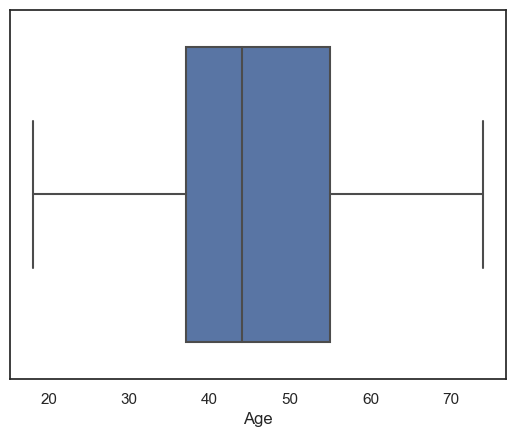

In [269]:
# Keep only the rows where 'Age' is less than or equal to 80
df = df[df['Age'] <= 80]

# Now, print the indices of any rows where 'Age' is still greater than 80 (should be empty)
print(df[df['Age'] > 80].index)

# Check the outliers of the 'Age' feature
sns.boxplot(x=df['Age'])

In [270]:
#save the cleaned data
df.to_csv('dataset/marketing_campaign_cleaned.csv', index=False)

In [271]:
#statistical summary of the data
df.describe()

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,45.098346,51676.153330,0.444345,0.506482,0.950827,353.790344,49.104604,0.008941,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,605.743406,2.326777,4.087170,2.662494,5.794367,14.870809,5.319177,0.064372,0.013411,0.072865,0.074654,0.072418,0.149307,0.447027
std,11.701917,11.701917,25615.057625,0.538467,0.544593,0.752037,202.137961,28.956073,0.094152,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,601.840466,1.932923,2.779461,2.923456,3.250940,7.676593,2.426386,0.245469,0.115052,0.259974,0.262890,0.259237,0.356471,0.890964
min,1940.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37.000000,34704.000000,0.000000,0.000000,0.000000,181.000000,24.000000,0.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,44.000000,51039.000000,0.000000,0.000000,1.000000,356.000000,49.000000,0.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,55.000000,68281.000000,1.000000,1.000000,1.000000,529.000000,74.000000,0.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.000000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1996.000000,74.000000,666666.000000,2.000000,2.000000,3.000000,699.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [272]:
#no customer accepted all 6 of the campaigns at the same time
#The maximum number of recency is 99, which means that the most customers are active within the last 100 days
#All the customers in the dataset joined in the last 2 years

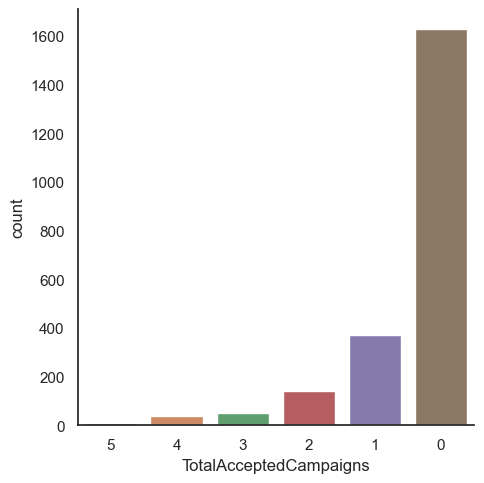

In [274]:
#sns countplot for the TotalacceptedCampaigns feature using catplot
#change the order of the x axis to be in ascending order in the graph
sns.catplot(x='TotalAcceptedCampaigns', data=df, kind='count',order=[5,4,3,2,1,0])
plt.show()

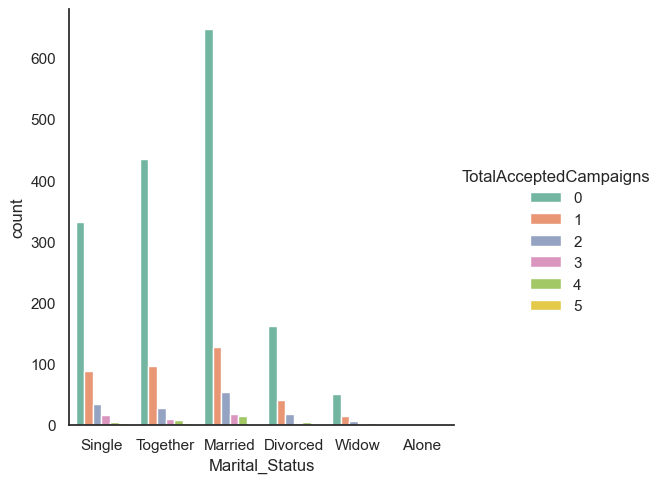

In [275]:
#sns countplot for the TotalacceptedCampaigns feature and the Marital_Status feature using catplot
sns.catplot(x='Marital_Status', data=df, kind='count', order=['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'], hue='TotalAcceptedCampaigns', palette='Set2')

<AxesSubplot: xlabel='Education', ylabel='count'>

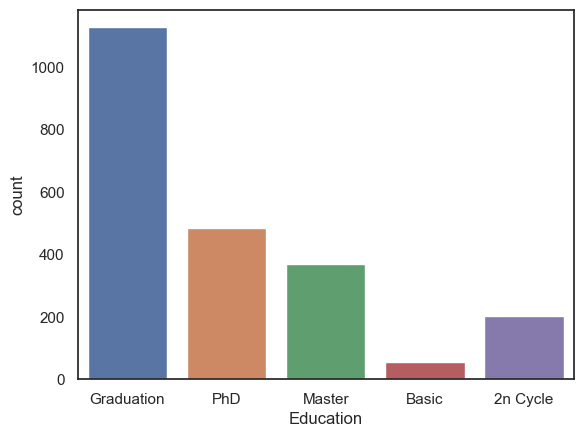

In [276]:
#count plot for education feature
sns.countplot(x='Education', data=df)

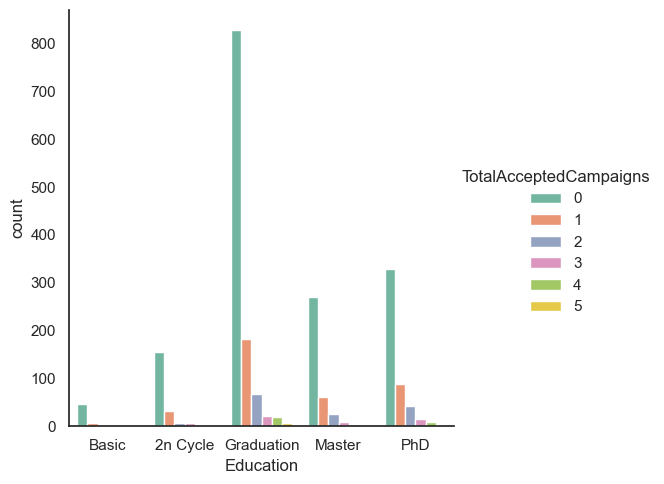

In [277]:
#sns countplot for the TotalacceptedCampaigns feature and the Education feature using catplot
sns.catplot(x='Education', data=df, kind='count', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], hue='TotalAcceptedCampaigns', palette='Set2')


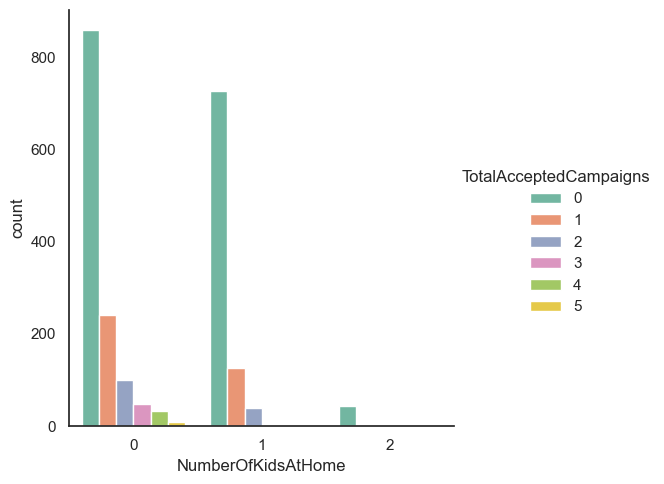

In [278]:
#create a complete analysis on what makes a customer accept a campaign
#sns countplot for the TotalacceptedCampaigns feature and the NumberOfKidsAtHome feature using catplot
sns.catplot(x='NumberOfKidsAtHome', data=df, kind='count', hue='TotalAcceptedCampaigns', palette='Set2')


<AxesSubplot: xlabel='Age'>

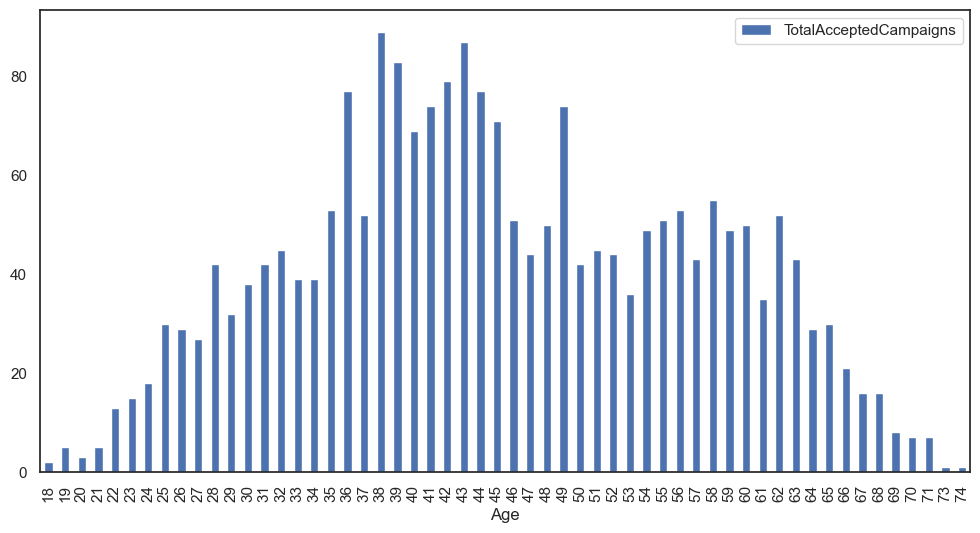

In [279]:
#print(df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').agg(['count', 'mean','median']))

df[['Age', 'TotalAcceptedCampaigns']].groupby('Age').count().plot(kind='bar', figsize=(12, 6))

C:/Users/USCS/AppData/Local/Temp/xpython_17344/435293474.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_subset = df_subset.corr()


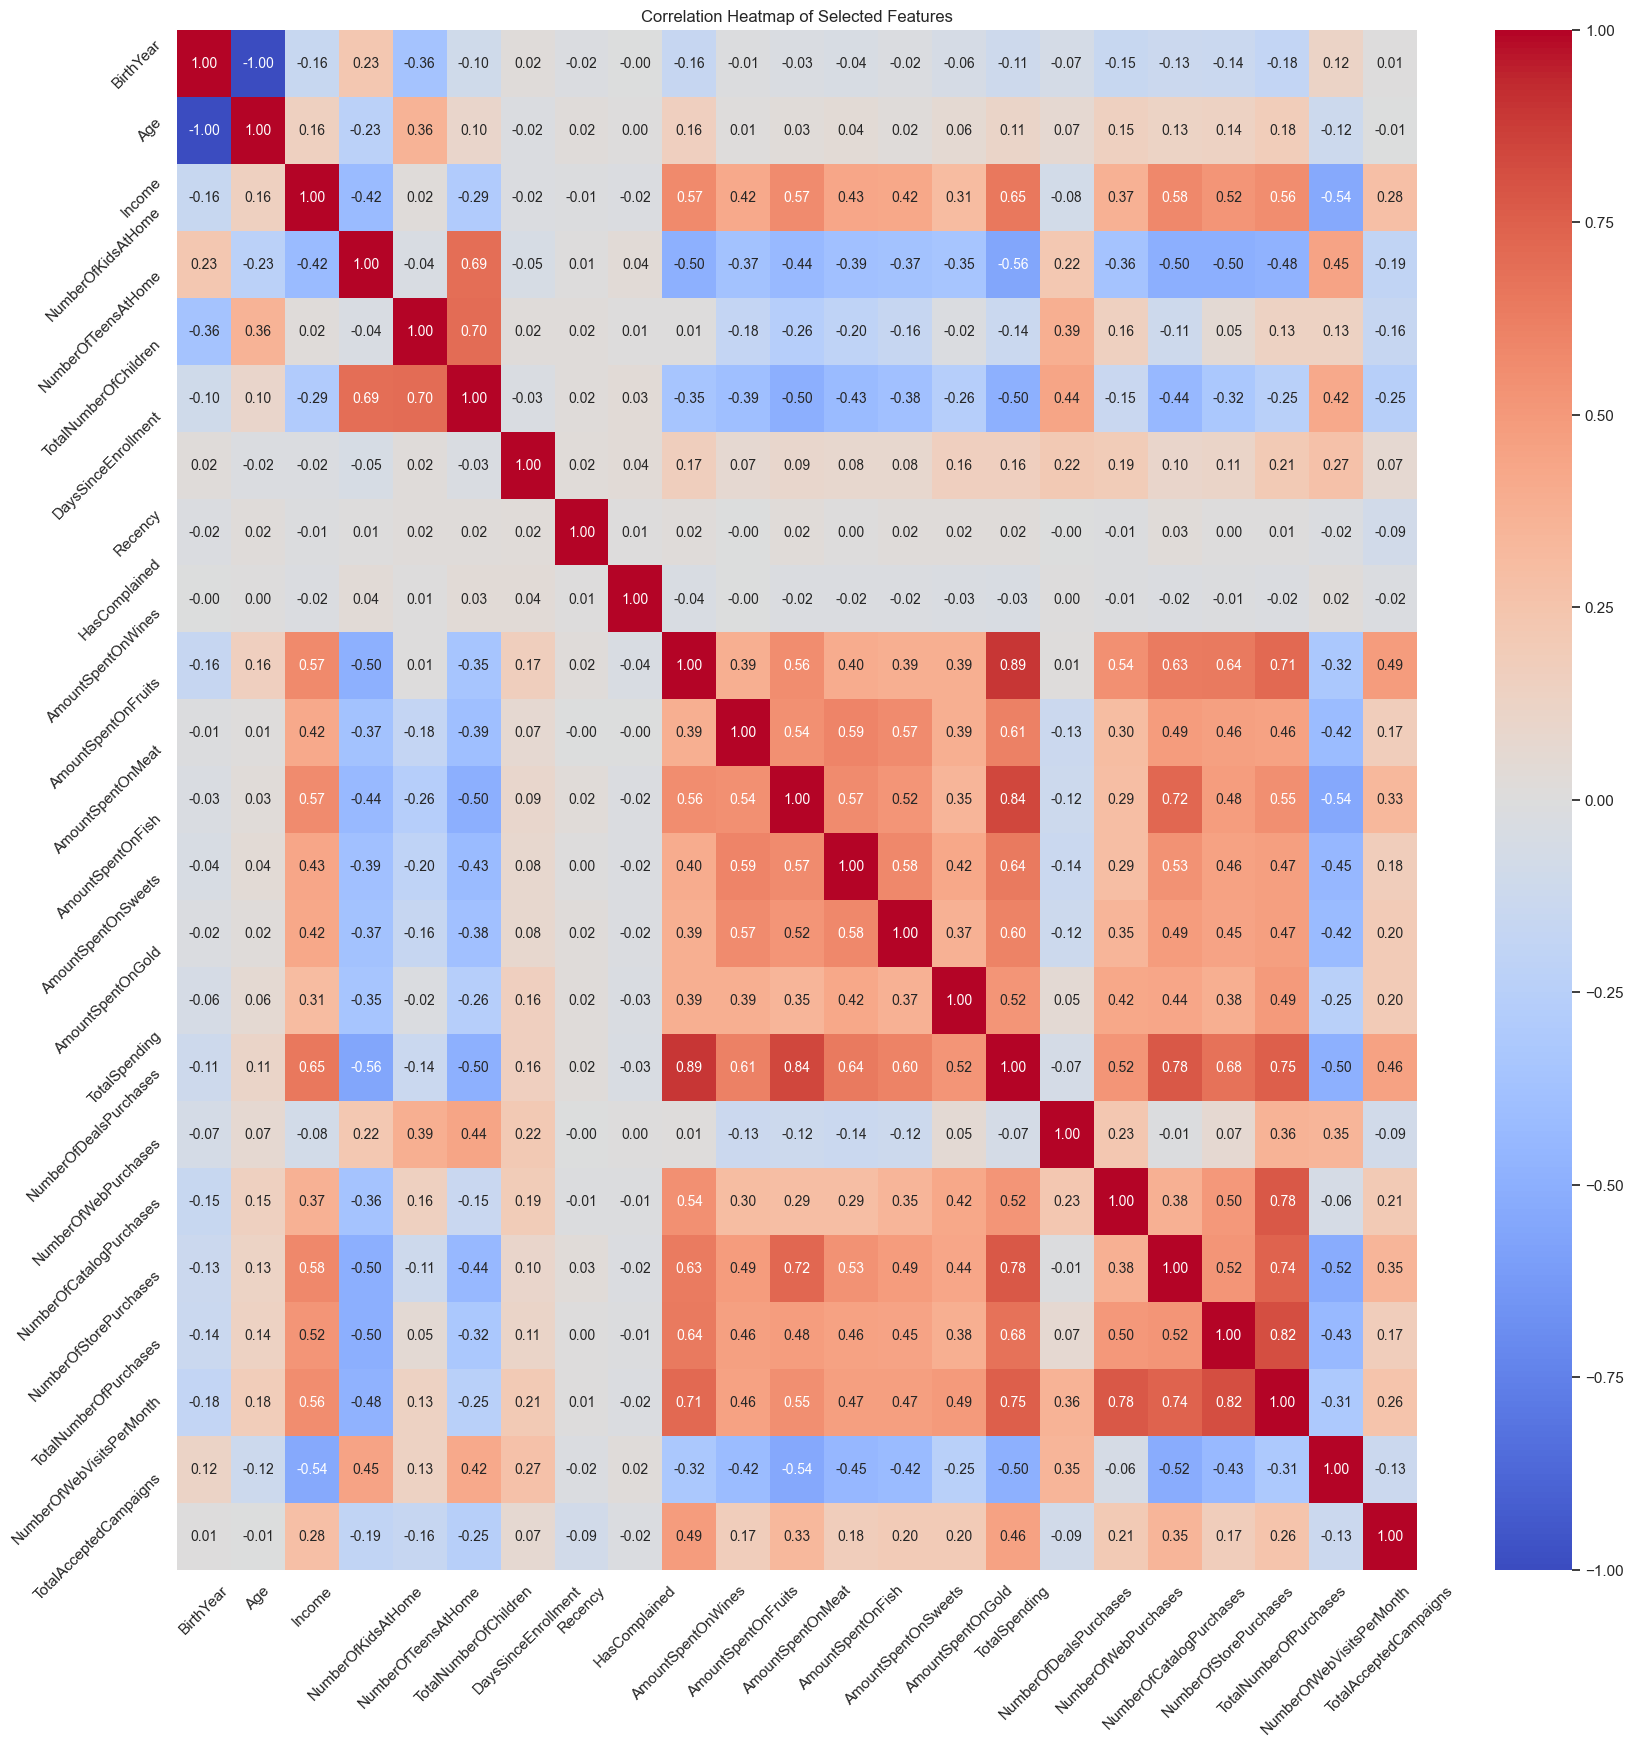

In [281]:
selected_columns = ['CustomerID', 'BirthYear', 'Age', 'Education', 'Marital_Status', 'Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'TotalNumberOfChildren', 'EnrollmentDate', 'DaysSinceEnrollment', 'Recency', 'HasComplained', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth',  'TotalAcceptedCampaigns'] # Add more relevant columns
df_subset = df[selected_columns]

# Correlation matrix for the subset
corr_matrix_subset = df_subset.corr()

# Enhancing readability of the heatmap
sns.set(style="white")
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={'size': 10})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

C:/Users/USCS/AppData/Local/Temp/xpython_17344/2743486474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  campaign_corr = df.corr()['TotalAcceptedCampaigns'].sort_values(ascending=False)


TotalAcceptedCampaigns       1.000000
TotalSpending                0.455918
NumberOfCatalogPurchases     0.351386
Income                       0.284233
TotalNumberOfPurchases       0.257708
NumberOfWebPurchases         0.205126
NumberOfStorePurchases       0.172876
DaysSinceEnrollment          0.068877
BirthYear                    0.007393
Age                         -0.007393
HasComplained               -0.015677
Recency                     -0.088749
NumberOfDealsPurchases      -0.093690
NumberOfWebVisitsPerMonth   -0.128092
NumberOfTeensAtHome         -0.158979
NumberOfKidsAtHome          -0.193287
TotalNumberOfChildren       -0.253522
Name: TotalAcceptedCampaigns, dtype: float64


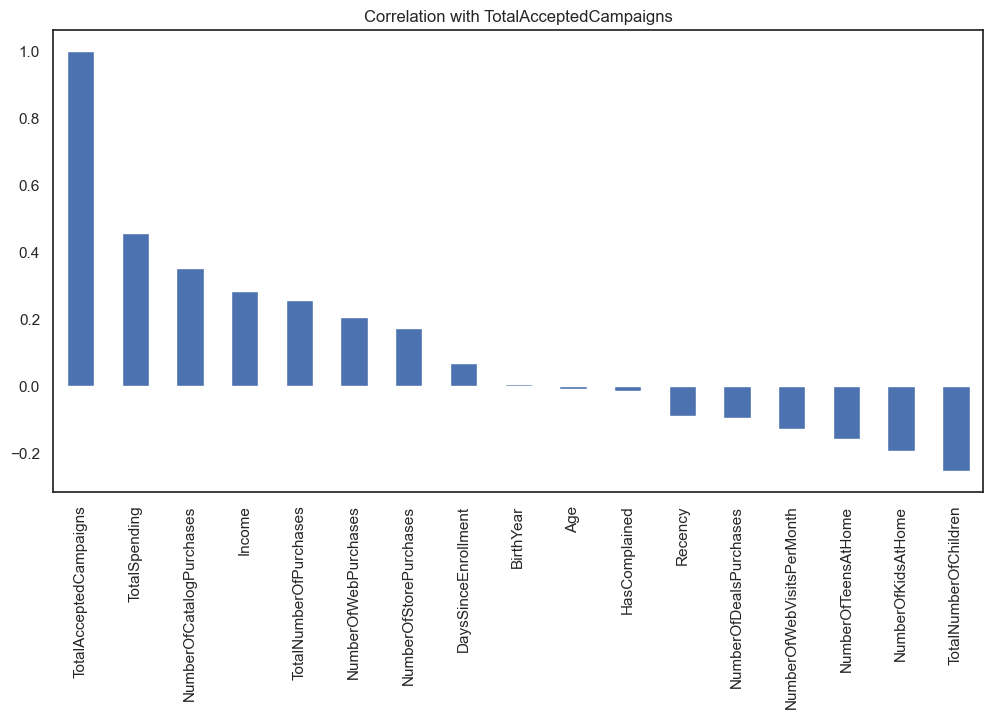

In [292]:
# Correlation with TotalAcceptedCampaigns while ignoring the AcceptedCampaigns features
## THIS IS A BIG MISTAKE BECAUSE THE ACCEPTEDCAMPAIGNS FEATURES ARE CATAGORICAL FEATURE 
## AND NOT NUMERICAL TO BE CALCULATED WITH CORRELATION
campaign_corr = df.corr()['TotalAcceptedCampaigns'].sort_values(ascending=False)
# Drop certain features
features_to_ignore = ['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                      'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign',
                      'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                      'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']
campaign_corr = campaign_corr.drop(features_to_ignore)
print(campaign_corr)
#preview the campaign_corr in a bar plot
campaign_corr.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation with TotalAcceptedCampaigns')
plt.show()


In [291]:
df.describe()

,BirthYear,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,45.098346,51676.153330,0.444345,0.506482,0.950827,353.790344,49.104604,0.008941,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,605.743406,2.326777,4.087170,2.662494,5.794367,14.870809,5.319177,0.064372,0.013411,0.072865,0.074654,0.072418,0.149307,0.447027
std,11.701917,11.701917,25615.057625,0.538467,0.544593,0.752037,202.137961,28.956073,0.094152,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,601.840466,1.932923,2.779461,2.923456,3.250940,7.676593,2.426386,0.245469,0.115052,0.259974,0.262890,0.259237,0.356471,0.890964
min,1940.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37.000000,34704.000000,0.000000,0.000000,0.000000,181.000000,24.000000,0.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,44.000000,51039.000000,0.000000,0.000000,1.000000,356.000000,49.000000,0.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,55.000000,68281.000000,1.000000,1.000000,1.000000,529.000000,74.000000,0.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.000000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1996.000000,74.000000,666666.000000,2.000000,2.000000,3.000000,699.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


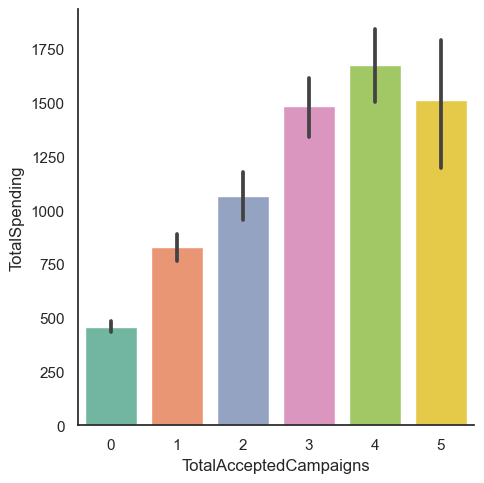

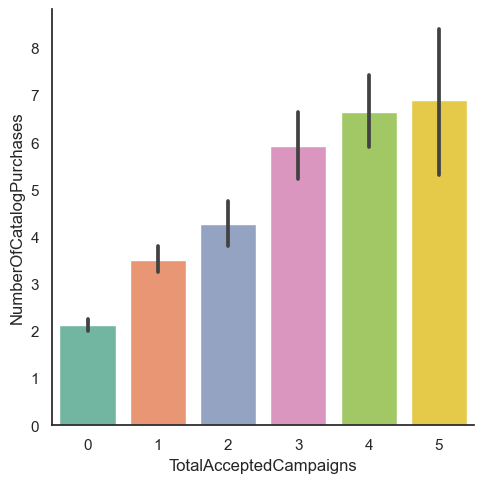

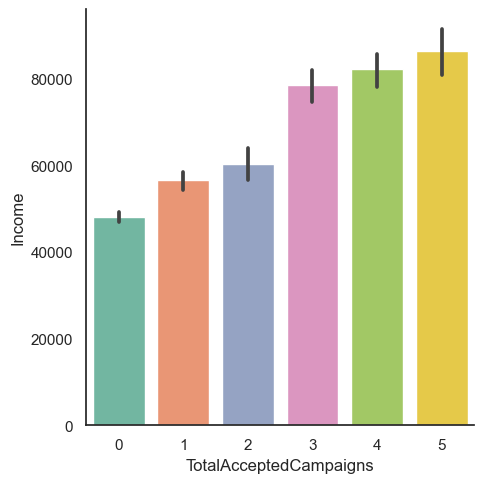

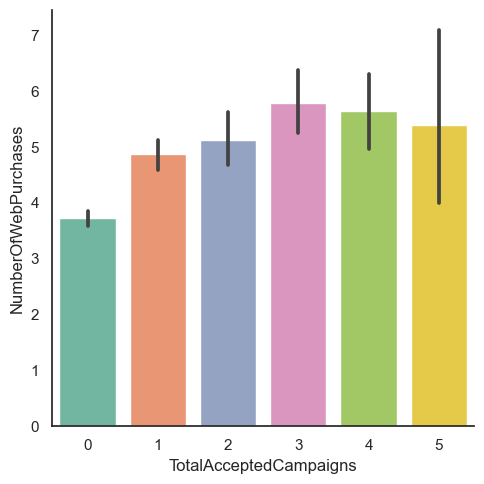

In [293]:
#create visualization plots to show the relationship between total accepted campaigns and other features
sns.catplot(x='TotalAcceptedCampaigns', y='TotalSpending', data=df, kind='bar', palette='Set2')
plt.show()
sns.catplot(x='TotalAcceptedCampaigns', y='NumberOfCatalogPurchases', data=df, kind='bar', palette='Set2')
plt.show()
sns.catplot(x='TotalAcceptedCampaigns', y='Income', data=df, kind='bar', palette='Set2')
plt.show()
sns.catplot(x='TotalAcceptedCampaigns', y='NumberOfWebPurchases', data=df, kind='bar', palette='Set2')
plt.show()



In [284]:
#there is a correlation between the number of catalog purchases, total spending, income and the number of accepted campaigns
#this means that: 
#1.Marketing campaigns usually uses catalogs to promote their products
#2.The more the customer spends the more likely he will accept a campaign
#3.The more the customer earns the more likely he will accept a campaign

In [294]:
df

,CustomerID,BirthYear,Age,Education,Marital_Status,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,EnrollmentDate,DaysSinceEnrollment,Recency,HasComplained,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
0,5524,1957,57,Graduation,Single,58138,0,0,0,2012-09-04,663,58,0,635,88,546,172,88,88,1617,3,8,10,4,25,7,0,0,0,0,0,1,1
1,2174,1954,60,Graduation,Single,46344,1,1,2,2014-03-08,113,38,0,11,1,6,2,1,6,27,2,1,1,2,6,5,0,0,0,0,0,0,0
2,4141,1965,49,Graduation,Together,71613,0,0,0,2013-08-21,312,26,0,426,49,127,111,21,42,776,1,8,2,10,21,4,0,0,0,0,0,0,0
3,6182,1984,30,Graduation,Together,26646,1,0,1,2014-02-10,139,26,0,11,4,20,10,3,5,53,2,2,0,4,8,6,0,0,0,0,0,0,0
4,5324,1981,33,PhD,Married,58293,1,0,1,2014-01-19,161,94,0,173,43,118,46,27,15,422,5,5,3,6,19,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Graduation,Married,61223,0,1,1,2013-06-13,381,46,0,709,43,182,42,118,247,1341,2,9,3,4,18,5,0,0,0,0,0,0,0
2236,4001,1946,68,PhD,Together,64014,2,1,3,2014-06-10,19,56,0,406,0,30,0,0,8,444,7,8,2,5,22,7,1,0,0,0,0,0,1
2237,7270,1981,33,Graduation,Divorced,56981,0,0,0,2014-01-25,155,91,0,908,48,217,32,12,24,1241,1,2,3,13,19,6,0,0,0,1,0,0,1
2238,8235,1956,58,Master,Together,69245,0,1,1,2014-01-24,156,8,0,428,30,214,80,30,61,843,2,6,5,10,23,3,0,0,0,0,0,0,0


count    2237.000000
mean        5.319177
std         2.426386
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumberOfWebVisitsPerMonth, dtype: float64

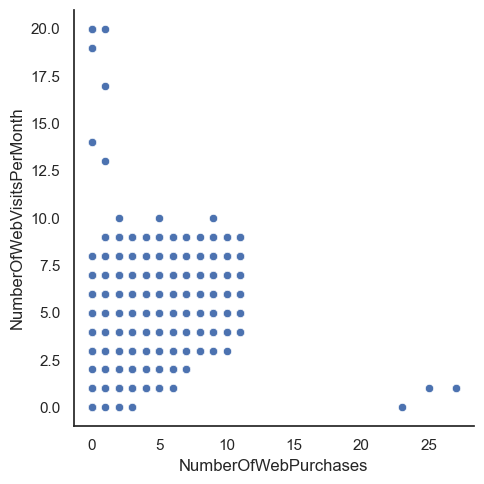

In [300]:
#relationship between the number of web purchases and the number of web visits in a visualiziot
sns.relplot(x='NumberOfWebPurchases', y='NumberOfWebVisitsPerMonth', data=df, kind='scatter')
df['NumberOfWebVisitsPerMonth'].corr(df['NumberOfWebPurchases'])
df['NumberOfWebVisitsPerMonth'].describe()

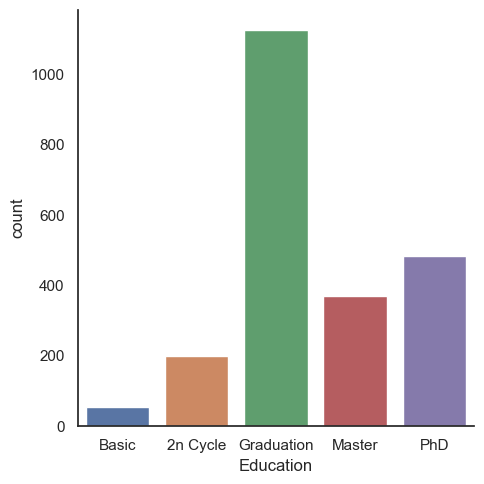

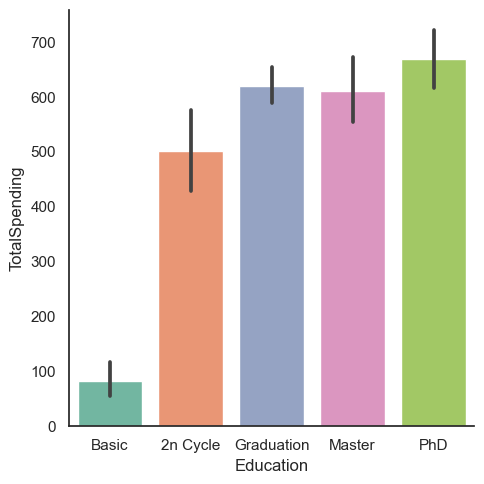

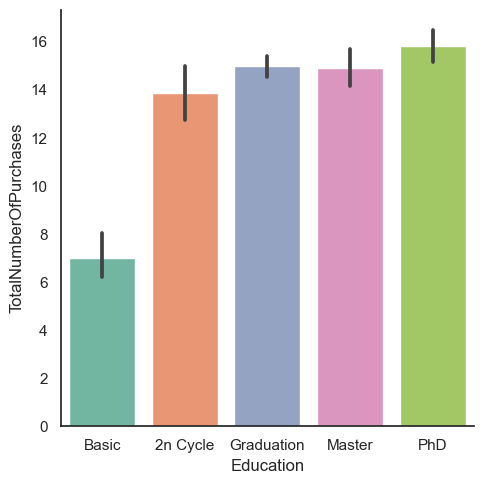

In [307]:
sns.catplot(x='Education', data=df, kind='count', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
sns.catplot(x='Education', y='TotalSpending', data=df, kind='bar', palette='Set2', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
#people with lower education are less likely to spend more money
sns.catplot(x='Education', y='TotalNumberOfPurchases', data=df, kind='bar', palette='Set2', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
#people with lower education are less likely to make more purchases


In [309]:
df.groupby('Education')['TotalSpending'].agg(['count', 'mean', 'median'])

,count,mean,median
Education,,,
2n Cycle,201,501.034826,205.0
Basic,54,81.796296,57.0
Graduation,1127,619.898846,414.0
Master,370,611.781081,387.5
PhD,485,669.975258,493.0


In [319]:
df.groupby('Education')['TotalNumberOfPurchases'].agg(['count', 'mean', 'median'])

,count,mean,median
Education,,,
2n Cycle,201,13.890547,12.0
Basic,54,7.018519,6.0
Graduation,1127,14.990240,15.0
Master,370,14.927027,15.0
PhD,485,15.830928,17.0


In [318]:
pd.set_option('display.max_rows', None)
print(df[df['Education'] == 'Basic']['TotalSpending'])
pd.reset_option('display.max_rows')

11       61
105      29
136      29
184      43
190      80
280     102
344      18
502     263
608      45
612      37
663      74
667      59
693      29
738      18
785      57
893      14
933      32
944      66
1027     80
1118     96
1128     24
1170     16
1174     75
1183     88
1220    101
1240     21
1246    119
1284    434
1324     50
1344     24
1361     62
1416     96
1592     58
1643     29
1677     36
1704    103
1714     64
1727     54
1746     28
1755     38
1768     43
1780     47
1896     80
2013    839
2077    102
2091     26
2104     75
2105     57
2133    103
2164     29
2183     69
2189     46
2200    106
2208     43
Name: TotalSpending, dtype: int64
